In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
building = pd.read_csv('../data/building_metadata.csv')
weather_train = pd.read_csv('../data/weather_train.csv')
weather_test = pd.read_csv('../data/weather_test.csv')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
train = train.merge(building, on='building_id', how='left')
test = test.merge(building, on='building_id', how='left')

train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')

In [6]:
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])

In [9]:
#Missing Data
(train.count() / len(train))

building_id           1.000000
meter                 1.000000
timestamp             1.000000
meter_reading         1.000000
site_id               1.000000
primary_use           1.000000
square_feet           1.000000
year_built            0.400100
floor_count           0.173472
air_temperature       0.995219
cloud_coverage        0.563449
dew_temperature       0.995047
precip_depth_1_hr     0.814553
sea_level_pressure    0.939075
wind_direction        0.928322
wind_speed            0.992893
dtype: float64

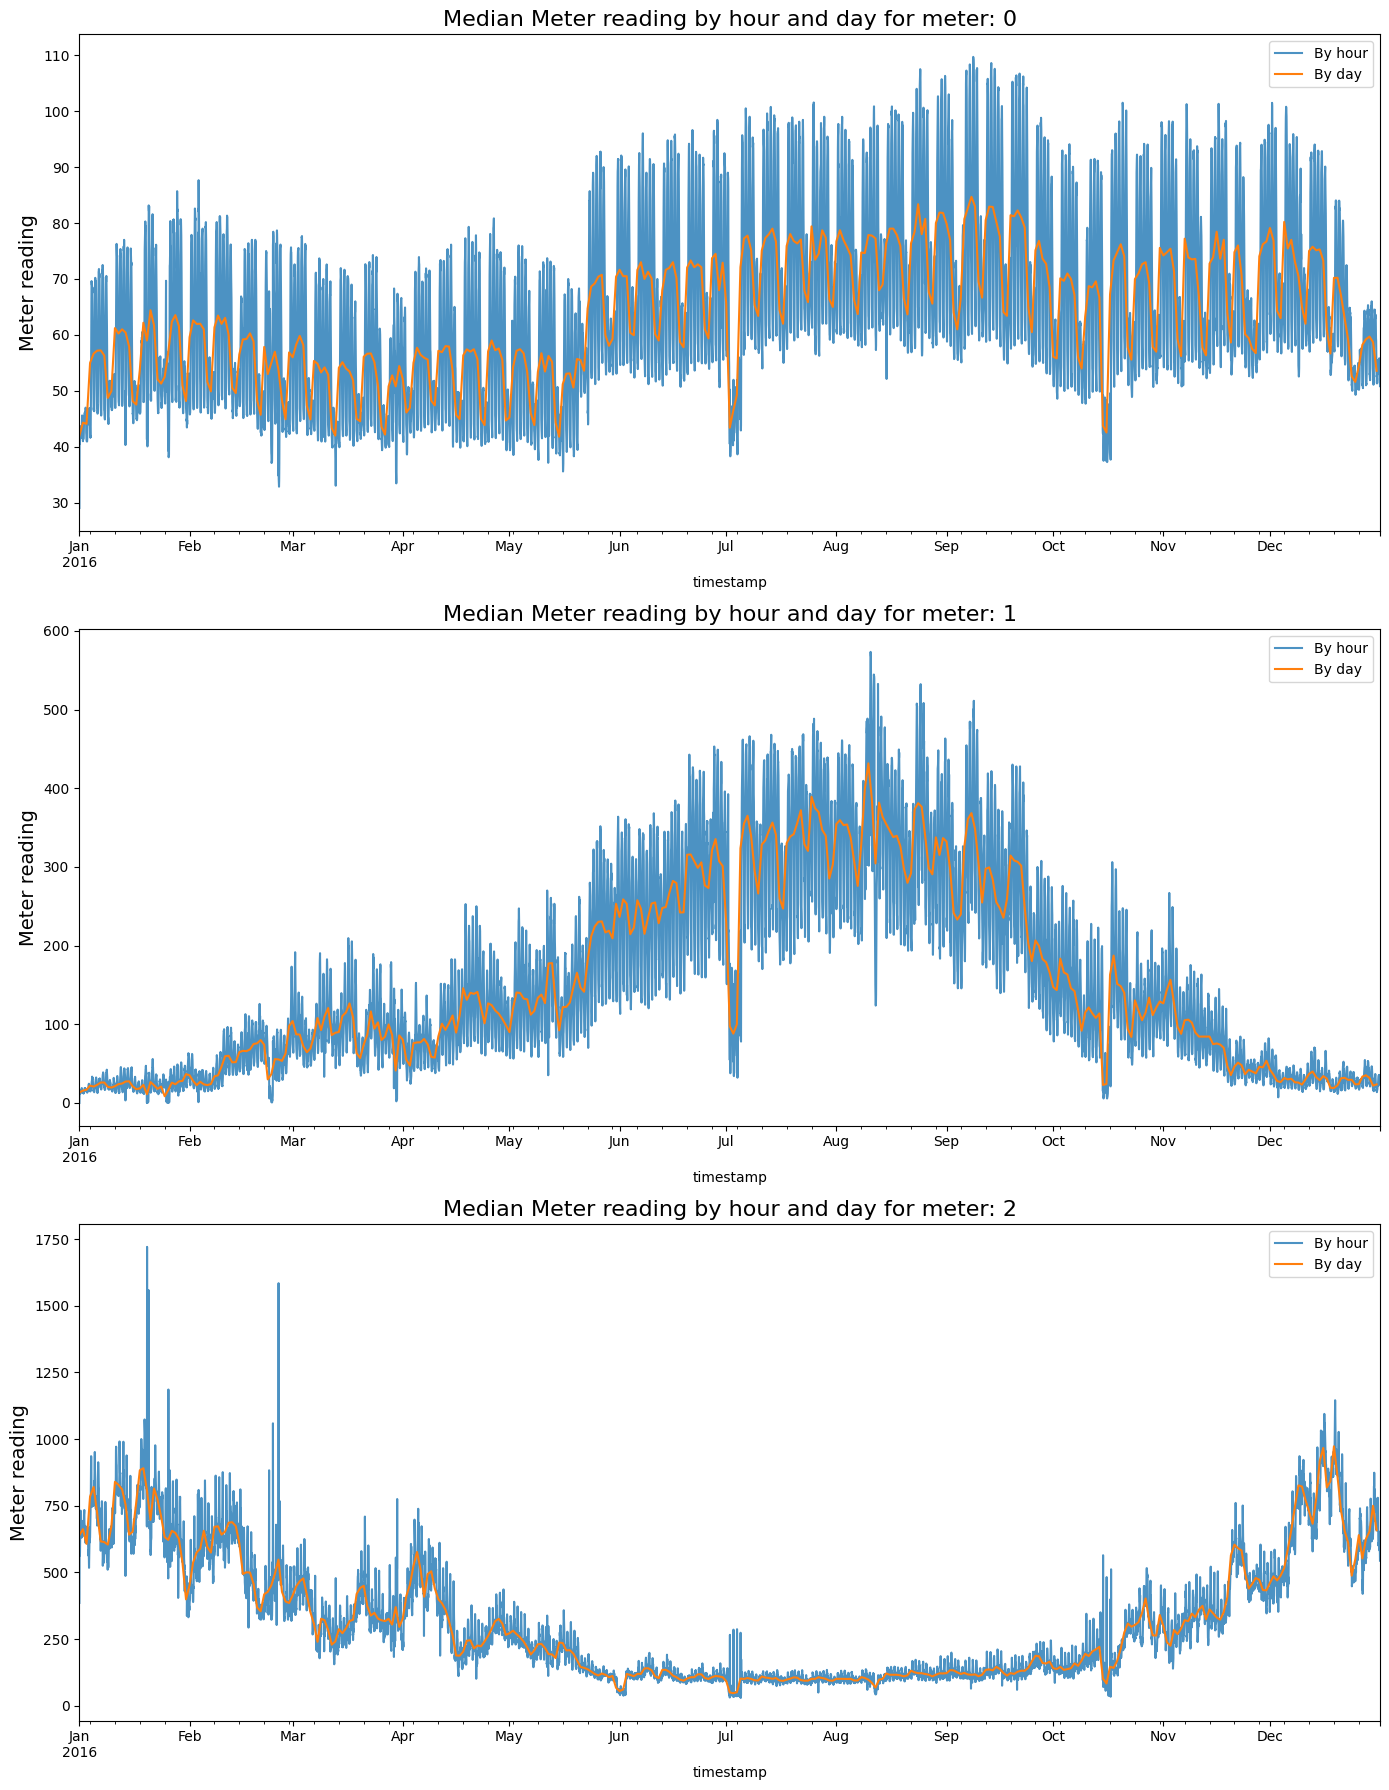

In [20]:
fig, axes = plt.subplots(3,1,figsize=(14, 18), dpi=100)
for i in range(3):
    train[train['meter'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').median()['meter_reading'].plot(ax=axes[i], label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14);
    train[train['meter'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').median()['meter_reading'].plot(ax=axes[i], label='By day', alpha=1).set_ylabel('Meter reading', fontsize=14);
    axes[i].set_title('Median Meter reading by hour and day for meter: '+ str(i), fontsize=16);
    axes[i].legend();
plt.tight_layout()

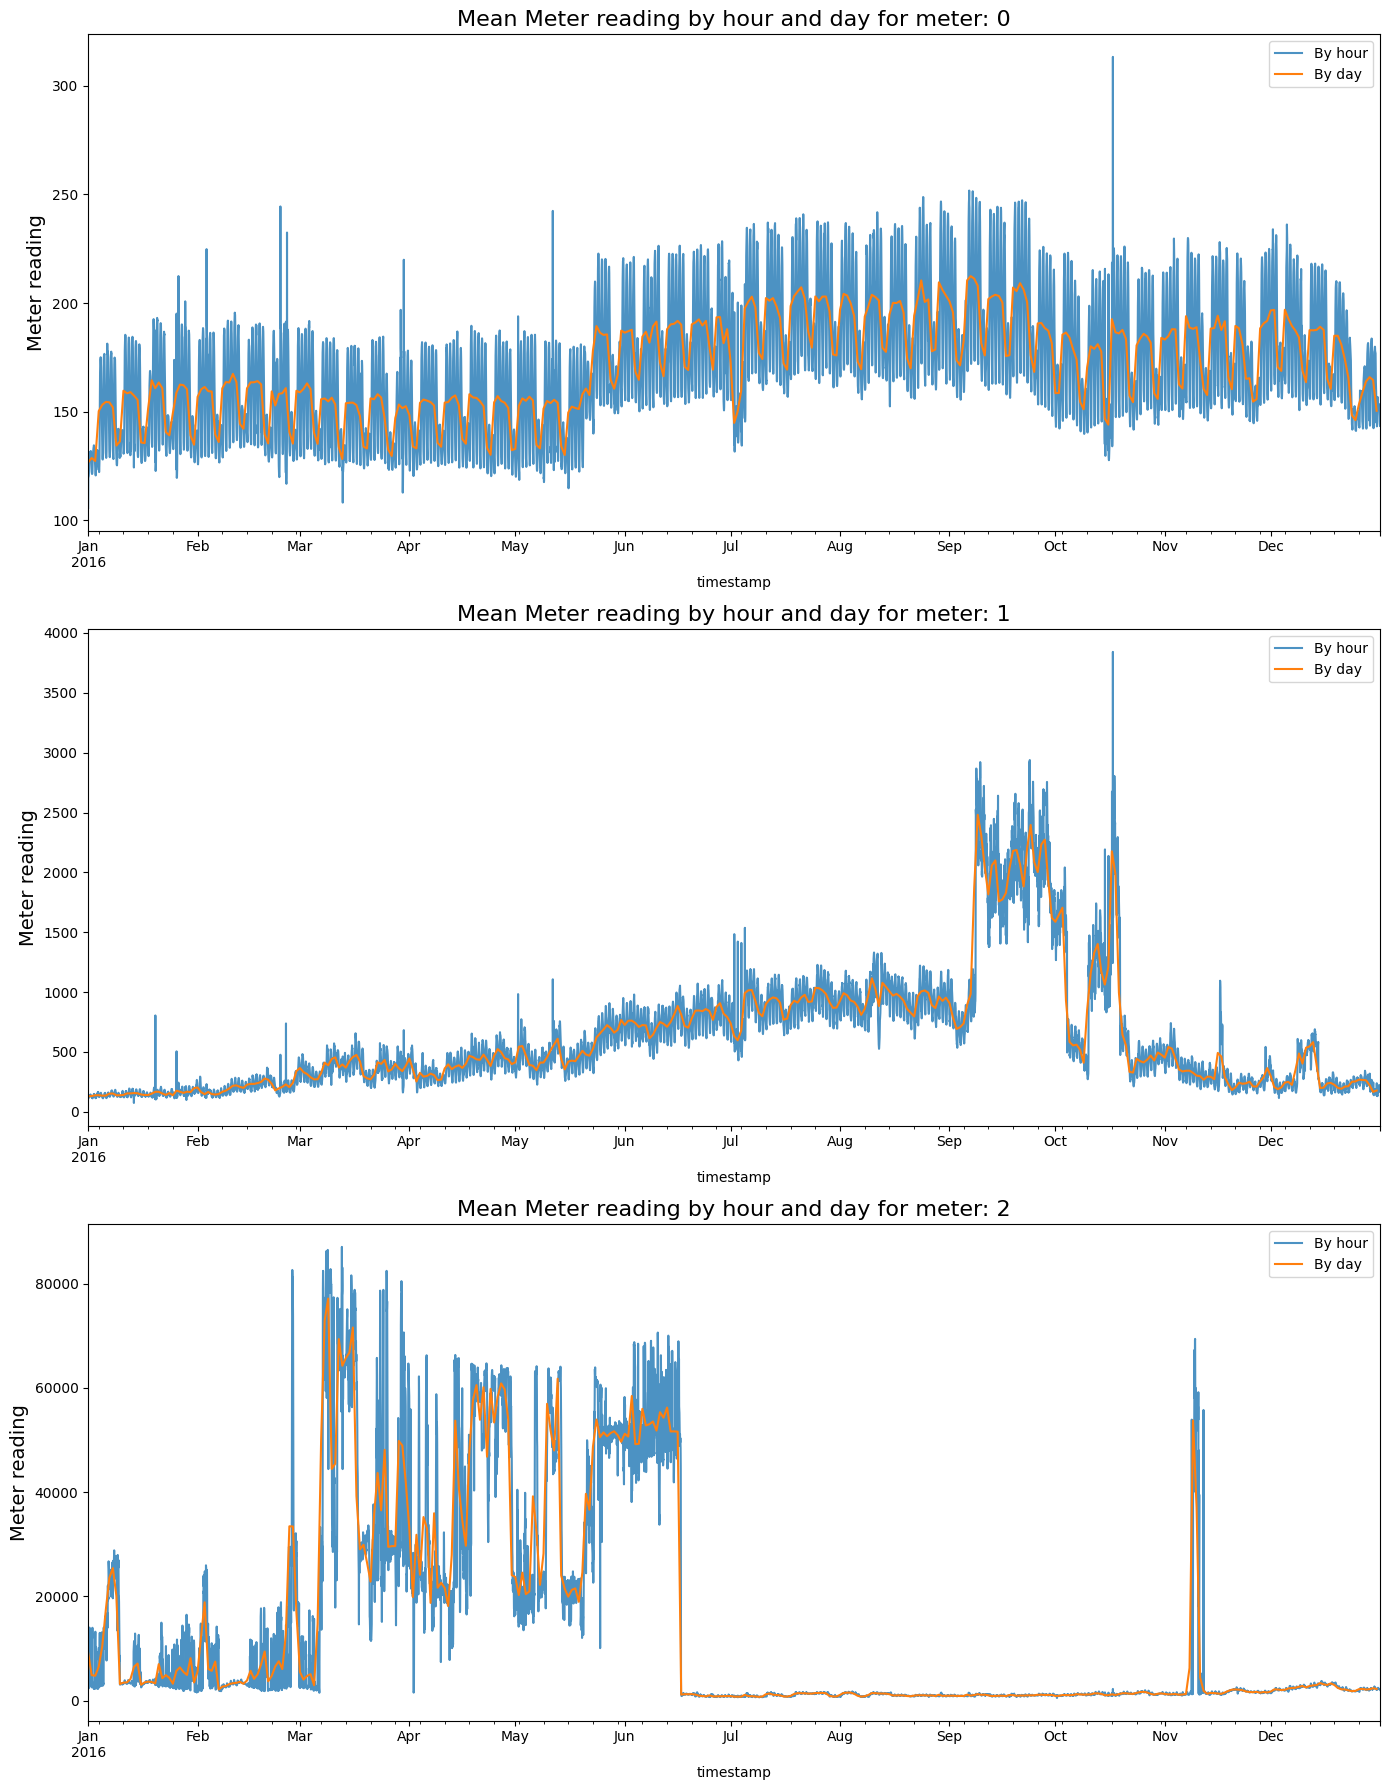

In [18]:
fig, axes = plt.subplots(3,1,figsize=(14, 18), dpi=100)
for i in range(3):
    train[train['meter'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i], label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14);
    train[train['meter'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i], label='By day', alpha=1).set_ylabel('Meter reading', fontsize=14);
    axes[i].set_title('Mean Meter reading by hour and day for meter: '+ str(i), fontsize=16);
    axes[i].legend();
plt.tight_layout()